## Policing Data Analysis at Traffic Stops for state of Rhode Island

In [2]:
#importing neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
## Preparing Data for Analysis
ri=pd.read_csv('police.csv')
ri.head()
# each row represent one stop

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [23]:
print(ri.shape)
print(ri.isnull().sum())

(91741, 15)
state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


##### As we can see that all county_name are missing we will drop this column as well as state is common for all records so we will drop it

In [24]:
#drop county_name 
ri.drop(['county_name','state'],axis='columns',inplace=True)

In [25]:
#For Analysis we want driver gender,stop date and stop time as they ar if they are missing we will drop the rows
ri.dropna(subset=['stop_date', 'stop_time','driver_gender'], inplace=True)

In [26]:
ri.shape

(86536, 13)

In [27]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [28]:
#After examining the data types we need to convert data types for stop time stop date and is_arrested column 
#Lets first start with is_arrested
ri['is_arrested'] = ri.is_arrested.astype('bool')
print(ri.is_arrested.dtypes)

bool


##### Now we want to create Datetime Index using stop date and stop time columns we will first combines these columns and then convert it into datetime and then will set index

In [29]:
combined = ri.stop_date.str.cat(ri.stop_time,sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)
print(ri.index)
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


### Now our Data is ready for Analysis 

<AxesSubplot:>

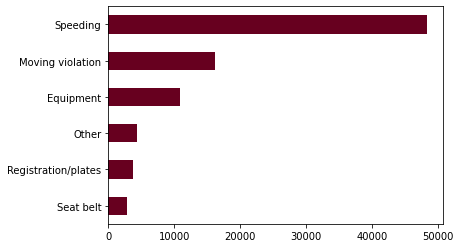

In [30]:
# Let us AQnalyze Violation Column
ri.violation.value_counts().sort_values().plot(kind='barh',colormap='RdBu')

#### We can see that Speeding is one of the Prominent causes of Violation

In [31]:
##percent by violation 
print(ri.violation.value_counts(normalize=True))

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


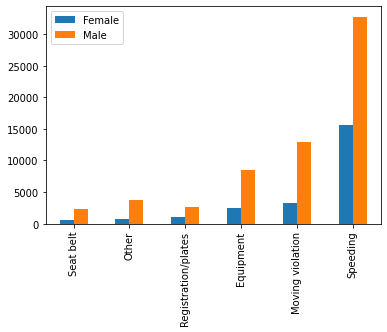

In [32]:
##Analyzing by Gender
male = ri[ri['driver_gender']=='M']
m1=male.violation.value_counts().sort_values()
female = ri[ri['driver_gender']=='F']
f1=female.violation.value_counts().sort_values()
df=pd.concat([f1,m1],axis='columns')

fig, ax = plt.subplots()
df.plot(kind='bar',ax=ax)
ax.legend(["Female", "Male"]);

#### From Above it can be seen that speeding remains the violation criteria in both genders we will take our Analysis deeper and will see the stop outcomes variable

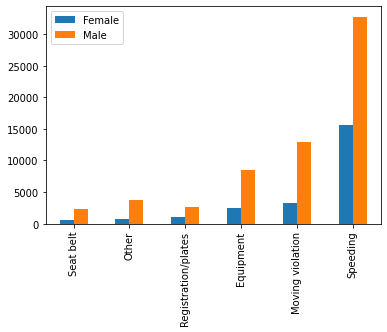

In [33]:
female_and_speeding = ri[(ri.driver_gender == 'F') &
(ri.violation == 'Speeding')]
f2=female_and_speeding.stop_outcome.value_counts().sort_values()

male_and_speeding = ri[(ri.driver_gender == 'M') &
(ri.violation == 'Speeding')]

m2=male_and_speeding.stop_outcome.value_counts().sort_values()

df2=pd.concat([f1,m1],axis='columns')

fig, ax = plt.subplots()
df2.plot(kind='bar',ax=ax)
ax.legend(["Female", "Male"]);

<AxesSubplot:>

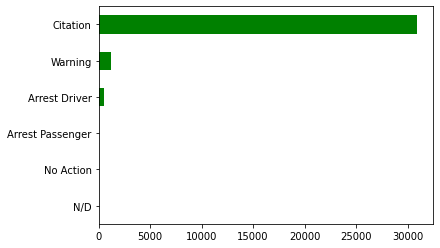

In [34]:
male_and_speeding = ri[(ri.driver_gender == 'M') &
(ri.violation == 'Speeding')]

male_and_speeding.stop_outcome.value_counts().sort_values().plot(kind='barh',color='g')

##### Another Factor in which we are interested in whether the driver gets arrested on stopping

<AxesSubplot:ylabel='is_arrested'>

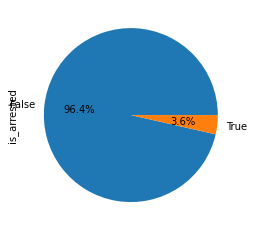

In [35]:
ri.is_arrested.value_counts(normalize=True).plot(kind='pie',autopct='%0.01f%%')

#We can see that about 3.6% people are arrested

##### Also we would like to see the arrest rate district wise


<AxesSubplot:ylabel='district'>

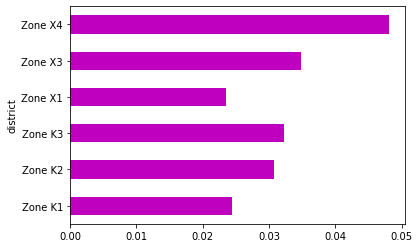

In [36]:
ri.groupby('district').is_arrested.mean().plot(kind='barh',color='m')

## we can see that in district X4 arrest rate is higher

In [37]:
ri.search_conducted.value_counts(normalize=True)

# This refers that 3.8215% times search is conducted on stopping let us analsye if there is effect of gender

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64

In [38]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

In [39]:
## It seems males are searched more but before making hypothesis we shall include another factor

In [40]:
ri.groupby(['violation','driver_gender']).search_conducted.mean()
## From this we cannot make any concrete hypothesis on effect of gender

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

### Now we come back to arrest rate and are interseted in finding whether time of day has any significance on arrest

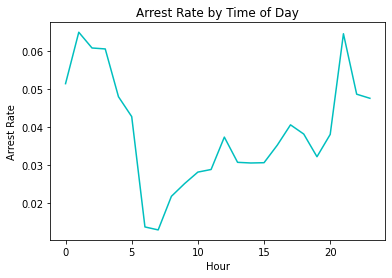

In [41]:
hourly_arrest_rate=ri.groupby(ri.index.hour).is_arrested.mean()


plt.plot(hourly_arrest_rate,'c')
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

#### It can be seen that in night hours the arrests are much higher

Text(0, 0.5, 'Drug related Stops')

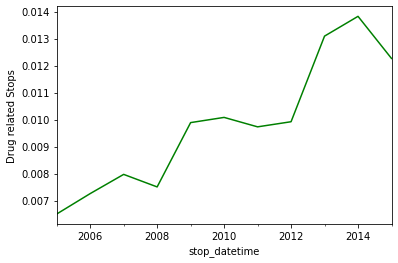

In [42]:
## Next we will like to see the drugs related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()
annual_drug_rate.plot(c='g')
plt.ylabel('Drug related Stops')

array([<AxesSubplot:xlabel='stop_datetime'>,
       <AxesSubplot:xlabel='stop_datetime'>], dtype=object)

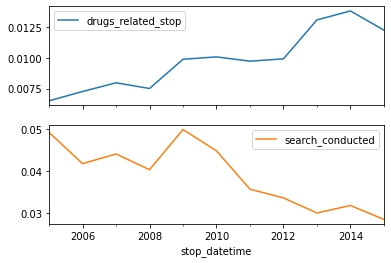

In [43]:
annual_search_rate = ri.search_conducted.resample('A').mean()
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')
annual.plot(subplots=True)

#### From the above we can see that although searh rate decreased drug related stops increased

In [44]:
print(pd.crosstab(ri.district, ri.violation))

all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

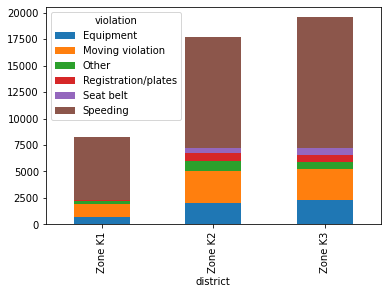

In [45]:
## Lets us Plot a stacked Bar Chart to get more insights
k_zones.plot(kind='bar',stacked=True)
plt.show()

##### In all the zones Speeding reamins the top most contributor

### An Interesting Aspect we would like to examine the time  one is detained after stopping lets examine 

In [46]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [47]:
## this durations are not available exactly lets map them to some integers
mapping = {'0-15 Min':8,'16-30 Min':23,'30+ Min':45}
ri['stop_minutes'] = ri.stop_duration.map(mapping)
print(ri['stop_minutes'].unique())

[ 8 23 45]


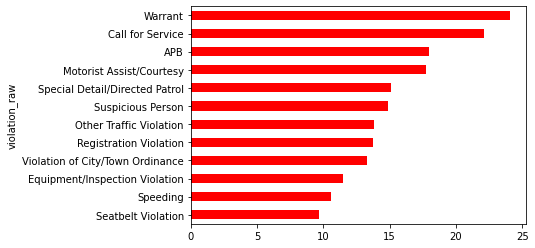

In [48]:
## Using our newly created field lets analyse violation
stop_length = ri.groupby('violation_raw').stop_minutes.mean()
stop_length.sort_values().plot(kind='barh',color='r')
plt.show()

In [ ]:
### Insights 
'''
Driver stopped for warrant has highest stopping time
'''

### Effect of Weather on Action of Traffic Police in the state (Data Taken from National Center of Environmental Information )

In [3]:
weather=pd.read_csv('weather.csv')

In [4]:
weather.columns

Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22'],
      dtype='object')

In [5]:
## The Columns of weather contains information about wind speed and temperature as well customization for bad weather conditions
weather.head()


,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [7]:
#Let us examine windspeed columns(in mph)
weather[['AWND','WSF2']].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


<AxesSubplot:>

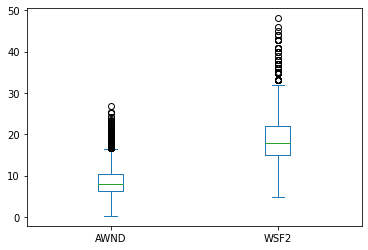

In [8]:
#The data seems reasonable let us create a box plot
weather[['AWND','WSF2']].plot(kind='box')

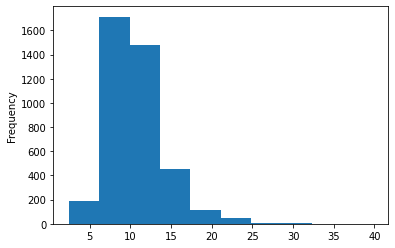

In [10]:
weather['WDIFF'] = weather.WSF2 - weather.AWND
weather.WDIFF.plot(kind='hist')
plt.show()

In [11]:
weather[['TMIN','TAVG','TMAX']].describe()

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


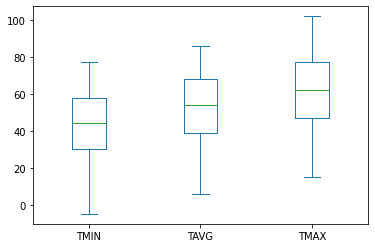

In [12]:
weather[['TMIN','TAVG','TMAX']].plot(kind='box')
plt.show()

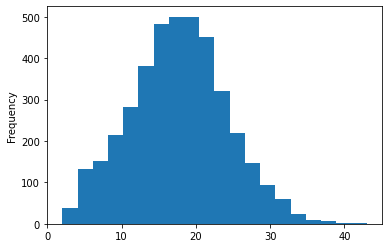

In [14]:
weather['TDIFF']=weather['TMAX']-weather['TMIN']
weather['TDIFF'].plot(kind='hist',bins=20)
plt.show()

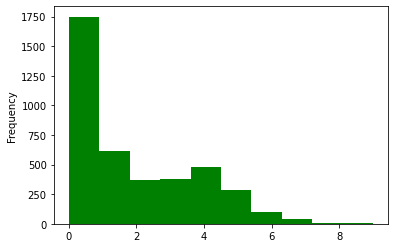

In [16]:
## Remaining Columns denote bad weather cnditions which denote unique bad weather condition 1 denotes it is present while Nan denotes not
WT = weather.loc[:, 'WT01':'WT22']

weather['bad_conditions'] = WT.sum(axis='columns')

weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

weather.bad_conditions.plot(kind='hist',color='g')

plt.show()

#### This shows that weather conditions was not bad many days

In [18]:
## Dictionary to map values to weather condition 0 means good 1-4 bad and 5-9 worse
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad',4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}
weather['rating'] = weather.bad_conditions.map(mapping)
print(weather['rating'].value_counts())

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


In [21]:
from pandas.api.types import CategoricalDtype
cats=['good','bad','worse']
cat_type = CategoricalDtype(categories=cats, ordered=True)
weather['rating'] = weather['rating'].astype(cat_type)
weather['rating'].head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

In [49]:
## Merging the Ri data set with Weather Rating dataset which consits of date and rating only
ri.reset_index(inplace=True)
weather_rating=weather[['DATE','rating']]
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')
print(ri_weather.shape)

(86536, 17)


### Now an important Question which arises that weather affect arrests or not

In [50]:
print(ri_weather.is_arrested.mean())
print(ri_weather.groupby(['rating'])['is_arrested'].mean())
print(ri_weather.groupby(['violation','rating'])['is_arrested'].mean())

0.0355690117407784
rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64
violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


In [51]:
arrest_rate=ri_weather.groupby(['violation','rating'])['is_arrested'].mean()
arrest_rate.unstack()
ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested')

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886


<AxesSubplot:xlabel='violation'>

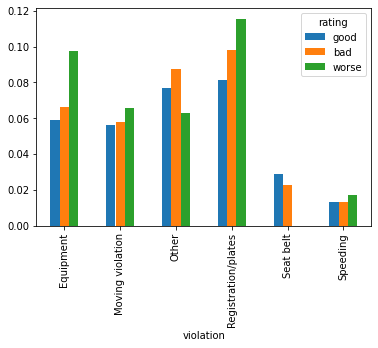

In [56]:
ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested').plot(kind='bar')

### Insight 
#### We can see that for each violation arrest rate increases for worse weather rating although it is doesnot specify a casual relationship but there exists a correlation within it